In [62]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cmocean.cm as cm
import glob
import sys

## Global definitions to use

In [63]:
year = 2018

# Look at gauged rivers

In [64]:
def read_gauged(fname):
    path = '../../../../../../results/forcing/rivers/observations/' + fname

    riv_df = pd.read_csv(path,header=None,delimiter=' ')
    mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
    riv = riv_df.rename(columns=mapping)
    riv_cols = riv.drop(columns=4)

    riv_cols['DateTime'] = pd.to_datetime(dict(year=riv_cols['YYYY'], month=riv_cols['MM'], day=riv_cols['DD']))

    return riv_cols

In [65]:
Nisqually = read_gauged('Nisqually_McKenna_flow')
Squamish = read_gauged('Squamish_Brackendale_flow')
Snohomish = read_gauged('Snohomish_Monroe_flow')
Skagit = read_gauged('Skagit_MountVernon_flow')
Cowichan = pd.read_csv('CowichanDuncan.csv',header=1)
Elwha = pd.read_csv('ElwhaMcdonald.csv')

In [66]:
Cowichan.head()

,ID,PARAM,TYPE,YEAR,DD,Jan,SYM,Feb,SYM.1,Mar,...,Aug,SYM.7,Sep,SYM.8,Oct,SYM.9,Nov,SYM.10,Dec,SYM.11
0,08GD004,1,1,1957,1,NaN,NaN,37.1,B,30.0,...,391.0,NaN,340.0,NaN,391.0,NaN,193.0,NaN,73.6,NaN
1,08GD004,1,1,1957,2,NaN,NaN,37.1,B,29.2,...,374.0,NaN,357.0,NaN,419.0,NaN,149.0,NaN,72.2,NaN
2,08GD004,1,1,1957,3,NaN,NaN,37.1,B,28.6,...,379.0,NaN,405.0,NaN,323.0,NaN,127.0,NaN,90.6,NaN
3,08GD004,1,1,1957,4,NaN,NaN,37.1,B,28.0,...,365.0,NaN,470.0,NaN,251.0,NaN,115.0,NaN,141.0,NaN
4,08GD004,1,1,1957,5,NaN,NaN,37.1,B,27.8,...,379.0,NaN,682.0,NaN,210.0,NaN,110.0,NaN,98.5,NaN


In [67]:
# test = Cowichan[['YEAR','Jan']]
# to_insert = len(test['YEAR'])*list('Jan')
# test.insert(1, 'MONTH', to_insert)
# test.groupby('YEAR')

In [68]:
## need to add month here? so that i can sort by both

pd.DataFrame(np.vstack((Cowichan[['YEAR','Jan']].to_numpy(), Cowichan[['YEAR','Feb']].to_numpy(), Cowichan[['YEAR','Mar']].to_numpy(), Cowichan[['YEAR','Apr']].to_numpy(), Cowichan[['YEAR','May']].to_numpy(), Cowichan[['YEAR','Jun']].to_numpy(), Cowichan[['YEAR','Jul']].to_numpy(), Cowichan[['YEAR','Aug']].to_numpy(), Cowichan[['YEAR','Sep']].to_numpy(), Cowichan[['YEAR','Oct']].to_numpy(), Cowichan[['YEAR','Nov']].to_numpy(), Cowichan[['YEAR','Dec']].to_numpy())), columns= ['YEAR', 'DISCHARGE'])

,YEAR,DISCHARGE
0,1957.0,NaN
1,1957.0,NaN
2,1957.0,NaN
3,1957.0,NaN
4,1957.0,NaN
...,...,...
29011,2022.0,14.083
29012,2022.0,13.782
29013,2022.0,13.628
29014,2022.0,13.567


In [69]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Homathko_Mouth_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
Homathko = riv_df.rename(columns=mapping)
Homathko['DateTime'] = pd.to_datetime(dict(year=Homathko['YYYY'], month=Homathko['MM'], day=Homathko['DD']))

In [70]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Salmon_Sayward_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
Salmon = riv_df.rename(columns=mapping)
Salmon['DateTime'] = pd.to_datetime(dict(year=Salmon['YYYY'], month=Salmon['MM'], day=Salmon['DD']))

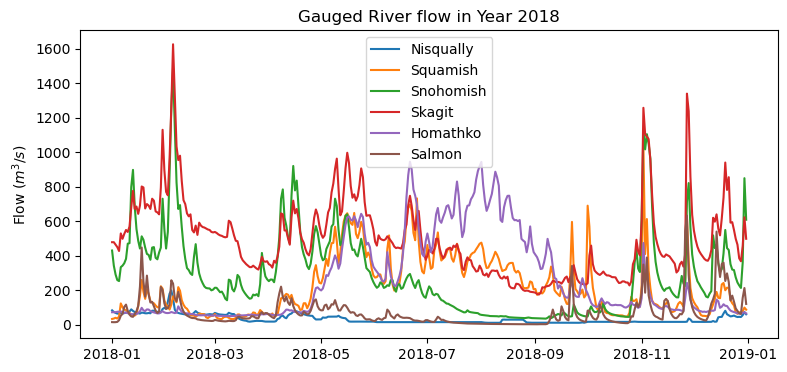

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Nisqually[Nisqually['YYYY'] == year]['DateTime'], Nisqually[Nisqually['YYYY'] == year]['DISCHARGE'], label='Nisqually')
ax.plot(Squamish[Squamish['YYYY'] == year]['DateTime'], Squamish[Squamish['YYYY'] == year]['DISCHARGE'], label='Squamish')
ax.plot(Snohomish[Snohomish['YYYY'] == year]['DateTime'], Snohomish[Snohomish['YYYY'] == year]['DISCHARGE'], label='Snohomish')
ax.plot(Skagit[Skagit['YYYY'] == year]['DateTime'], Skagit[Skagit['YYYY'] == year]['DISCHARGE'], label='Skagit')
ax.plot(Homathko[Homathko['YYYY'] == year]['DateTime'], Homathko[Homathko['YYYY'] == year]['DISCHARGE'], label='Homathko')
ax.plot(Salmon[Salmon['YYYY'] == year]['DateTime'], Salmon[Salmon['YYYY'] == year]['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow in Year ' + str(year))

plt.legend()

Text(0.5, 1.0, 'Nisqually guaged river flow avg over all data')

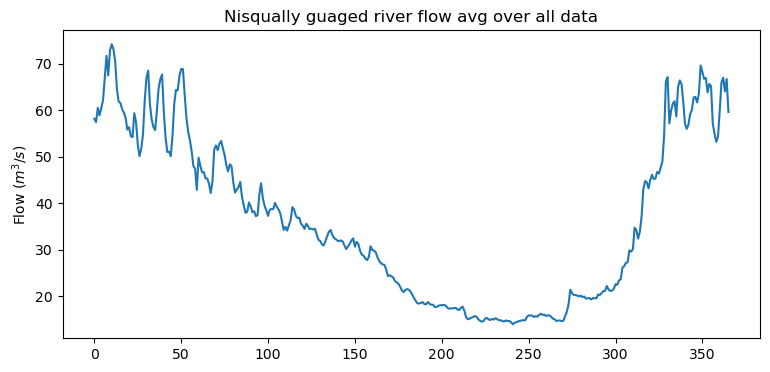

In [72]:
Nisqually_avg = Nisqually[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Nisqually_avg['DISCHARGE'])), Nisqually_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Nisqually guaged river flow avg over all data')

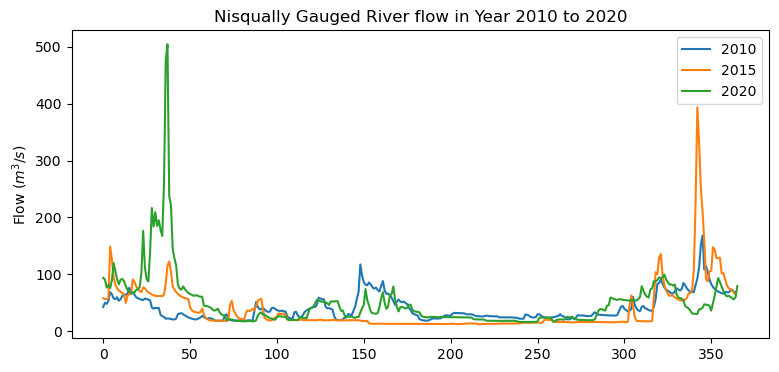

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Nisqually[Nisqually['YYYY'] == 2010]['DISCHARGE'])), Nisqually[Nisqually['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Nisqually[Nisqually['YYYY'] == 2015]['DateTime'])), Nisqually[Nisqually['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Nisqually[Nisqually['YYYY'] == 2020]['DateTime'])), Nisqually[Nisqually['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Nisqually Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Squamish guaged river flow avg over all data')

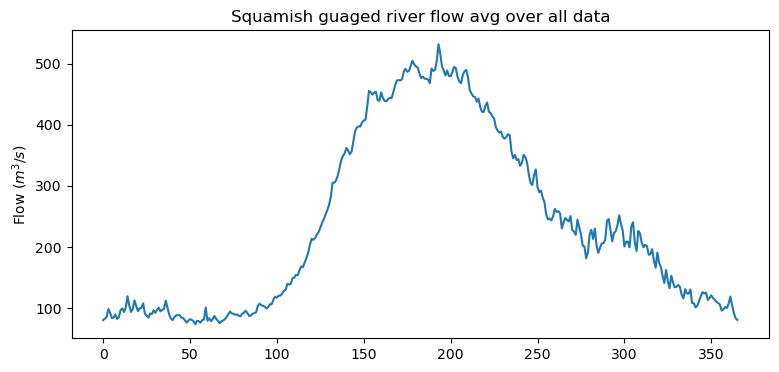

In [74]:
Squamish_avg = Squamish[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Squamish_avg['DISCHARGE'])), Squamish_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Squamish guaged river flow avg over all data')

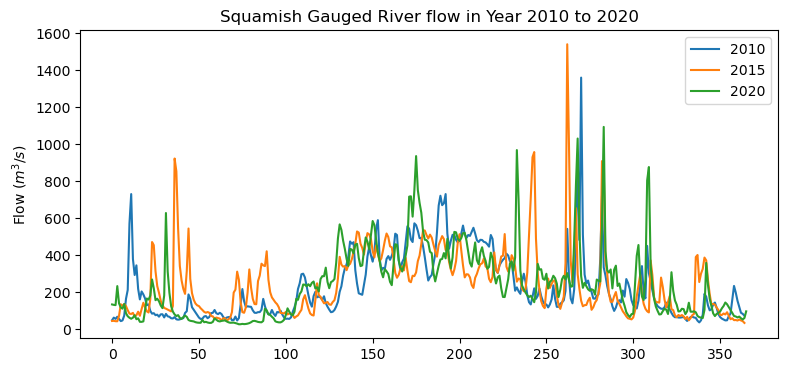

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Squamish[Squamish['YYYY'] == 2010]['DISCHARGE'])), Squamish[Squamish['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Squamish[Squamish['YYYY'] == 2015]['DateTime'])), Squamish[Squamish['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Squamish[Squamish['YYYY'] == 2020]['DateTime'])), Squamish[Squamish['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Squamish Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Snohomish guaged river flow avg over all data')

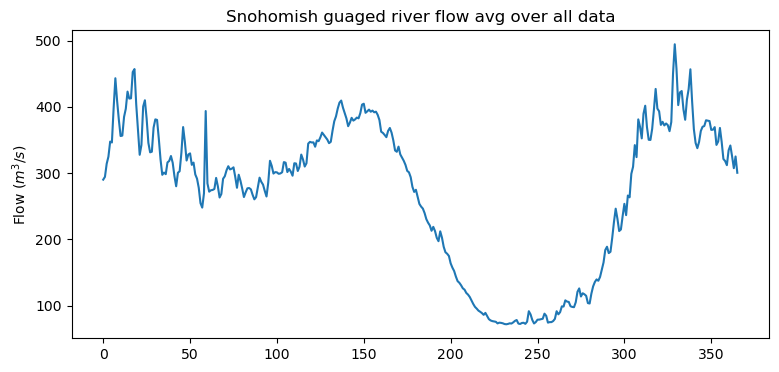

In [76]:
Snohomish_avg = Snohomish[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Snohomish_avg['DISCHARGE'])), Snohomish_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Snohomish guaged river flow avg over all data')

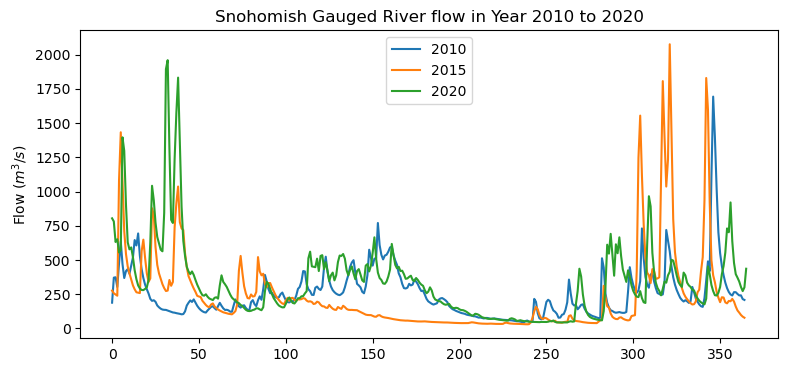

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2010]['DISCHARGE'])), Snohomish[Snohomish['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2015]['DateTime'])), Snohomish[Snohomish['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Snohomish[Snohomish['YYYY'] == 2020]['DateTime'])), Snohomish[Snohomish['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Snohomish Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Skagit guaged river flow avg over all data')

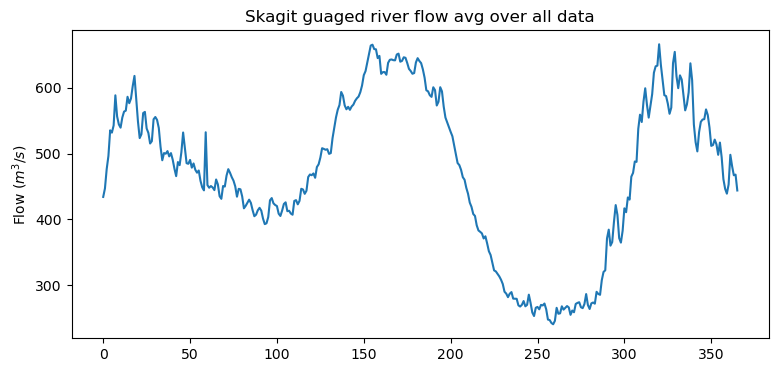

In [78]:
Skagit_avg = Skagit[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Skagit_avg['DISCHARGE'])), Skagit_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Skagit guaged river flow avg over all data')

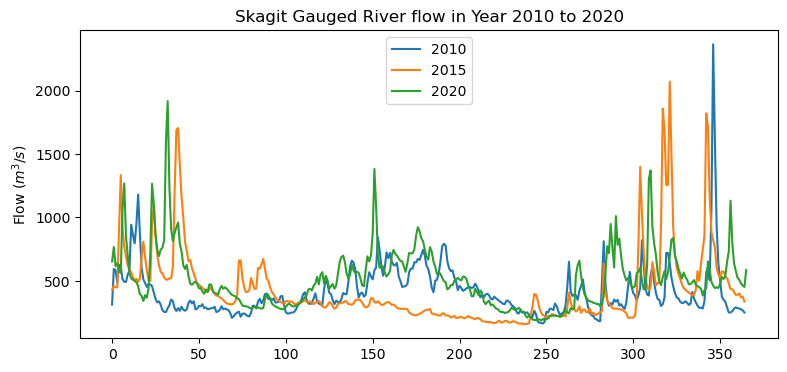

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Skagit[Skagit['YYYY'] == 2010]['DISCHARGE'])), Skagit[Skagit['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Skagit[Skagit['YYYY'] == 2015]['DateTime'])), Skagit[Skagit['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Skagit[Skagit['YYYY'] == 2020]['DateTime'])), Skagit[Skagit['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Skagit Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Homathko guaged river flow avg over all data')

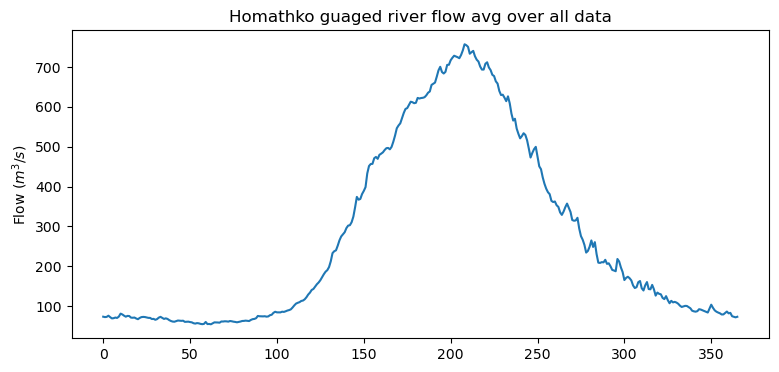

In [80]:
Homathko_avg = Homathko[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Homathko_avg['DISCHARGE'])), Homathko_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Homathko guaged river flow avg over all data')

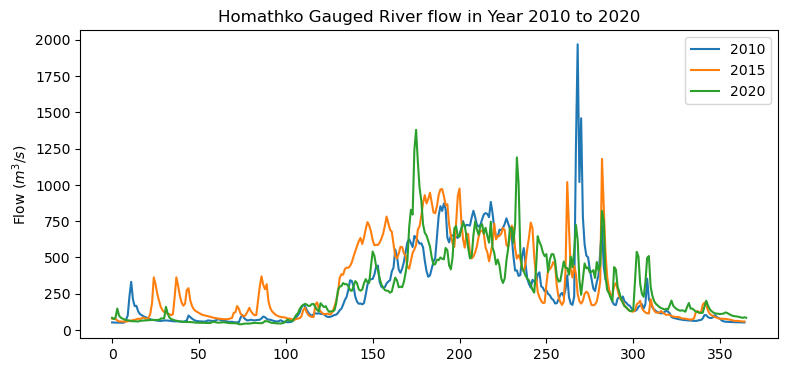

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Homathko[Homathko['YYYY'] == 2010]['DISCHARGE'])), Homathko[Homathko['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Homathko[Homathko['YYYY'] == 2015]['DateTime'])), Homathko[Homathko['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Homathko[Homathko['YYYY'] == 2020]['DateTime'])), Homathko[Homathko['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Homathko Gauged River flow in Year 2010 to 2020')

plt.legend()

Text(0.5, 1.0, 'Salmon guaged river flow avg over all data')

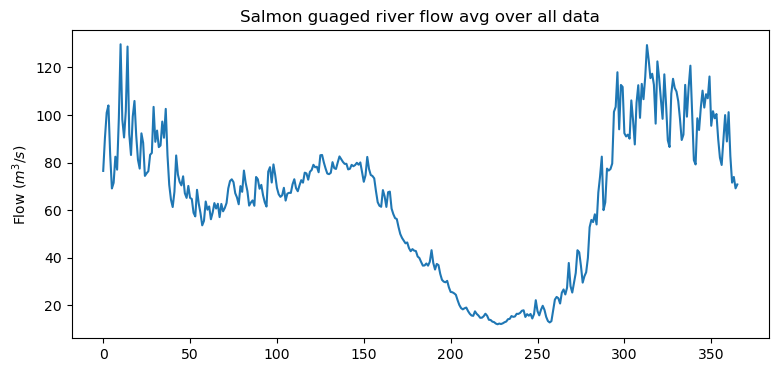

In [82]:
Salmon_avg = Salmon[['MM', 'DD', 'DISCHARGE']].groupby(by=['MM', 'DD']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Salmon_avg['DISCHARGE'])), Salmon_avg['DISCHARGE'])

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Salmon guaged river flow avg over all data')

Text(0.5, 1.0, 'Salmon Gauged River flow in Year 2010 to 2020')

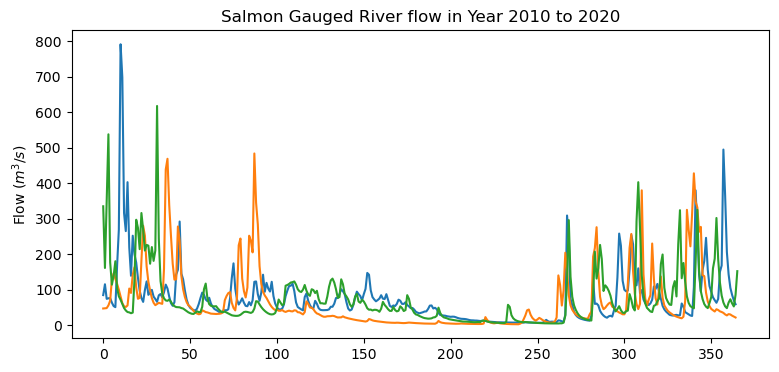

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))


ax.plot(range(len(Salmon[Salmon['YYYY'] == 2010]['DISCHARGE'])), Salmon[Salmon['YYYY'] == 2010]['DISCHARGE'], label='2010')
ax.plot(range(len(Salmon[Salmon['YYYY'] == 2015]['DateTime'])), Salmon[Salmon['YYYY'] == 2015]['DISCHARGE'], label='2015')
ax.plot(range(len(Salmon[Salmon['YYYY'] == 2020]['DateTime'])), Salmon[Salmon['YYYY'] == 2020]['DISCHARGE'], label='2020')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Salmon Gauged River flow in Year 2010 to 2020')

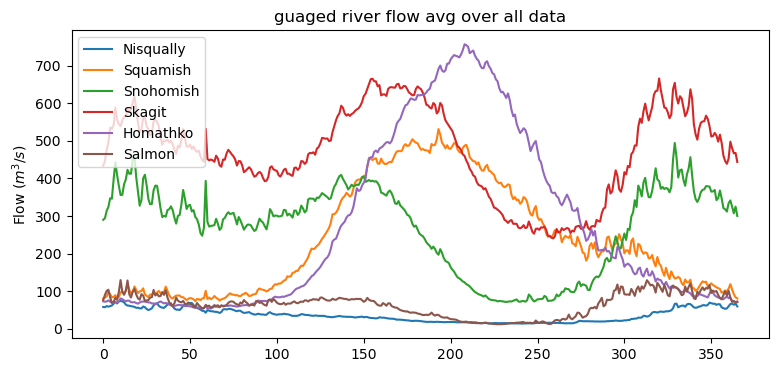

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(range(len(Nisqually_avg['DISCHARGE'])), Nisqually_avg['DISCHARGE'], label='Nisqually')
ax.plot(range(len(Squamish_avg['DISCHARGE'])), Squamish_avg['DISCHARGE'], label='Squamish')
ax.plot(range(len(Snohomish_avg['DISCHARGE'])), Snohomish_avg['DISCHARGE'], label='Snohomish')
ax.plot(range(len(Skagit_avg['DISCHARGE'])), Skagit_avg['DISCHARGE'], label='Skagit')
ax.plot(range(len(Homathko_avg['DISCHARGE'])), Homathko_avg['DISCHARGE'], label='Homathko')
ax.plot(range(len(Salmon_avg['DISCHARGE'])), Salmon_avg['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('guaged river flow avg over all data')

plt.legend()

## Look at dailies rivers

In [85]:
sys.path.insert(1, '../../../../MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import river_202108 as rivers

In [86]:
year_dailies_path = '../../../../../../results/forcing/rivers/R202108Dailies_y' + str(year) + '*.nc'
year_dailies_list = sorted(glob.glob(year_dailies_path))

In [87]:
year_field = xr.open_dataset(year_dailies_list[0]).rorunoff[0,:,:]

for daily in year_dailies_list:
    day_field = xr.open_dataset(daily).rorunoff[0,:,:]

    year_field = np.dstack([year_field, day_field])

In [88]:
year_field  # need to remove first element
year_field_fin = np.delete(year_field, 0, axis=2)

In [89]:
# write a function that accepts a year field, a watershed, and a river name and creates a timeseries

def ts_from_dai(w_shed, r_call, data_field):
    return data_field[rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j'], :]

In [90]:
Nisqually_dai = ts_from_dai('puget','NisquallyMcAllister',year_field_fin)
Squamish_dai = ts_from_dai('howe','Squamish',year_field_fin)
Homathko_dai = ts_from_dai('bute','Homathko',year_field_fin)
Elwha_dai = ts_from_dai('jdf','Elwha',year_field_fin)
Nanaimo_dai = ts_from_dai('evi_s','Nanaimo1',year_field_fin)  # others
Cowichan_dai = ts_from_dai('evi_s','Cowichan1',year_field_fin)  # others
Stillaguamish_dai = ts_from_dai('skagit','Stillaguamish1',year_field_fin)  # others
Puyallup_dai = ts_from_dai('puget','Puyallup',year_field_fin)
Campbell_dai = ts_from_dai('fraser','LittleCampbell',year_field_fin)
Nooksack_dai = ts_from_dai('fraser','Nooksack',year_field_fin)  # others
Snohomish_dai = ts_from_dai('skagit','SnohomishAllenQuilceda',year_field_fin)
Skagit_dai = ts_from_dai('skagit','Skagit1',year_field_fin)  # others
Salmon_dai = ts_from_dai('evi_n','SalmonSayward',year_field_fin)

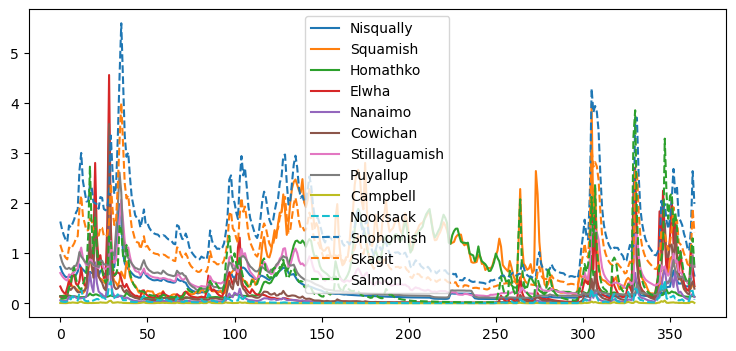

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Nisqually_dai, linewidth = 1.5,label='Nisqually')
ax.plot(Squamish_dai, linewidth = 1.5,label='Squamish')
ax.plot(Homathko_dai, linewidth = 1.5,label='Homathko')
ax.plot(Elwha_dai, linewidth = 1.5,label='Elwha')
ax.plot(Nanaimo_dai, linewidth = 1.5,label='Nanaimo')
ax.plot(Cowichan_dai, linewidth = 1.5,label='Cowichan')
ax.plot(Stillaguamish_dai, linewidth = 1.5,label='Stillaguamish')
ax.plot(Puyallup_dai, linewidth = 1.5,label='Puyallup')
ax.plot(Campbell_dai, linewidth = 1.5,label='Campbell')
ax.plot(Nooksack_dai, linewidth = 1.5,linestyle='--',label='Nooksack')
ax.plot(Snohomish_dai, linewidth = 1.5,linestyle='--',label='Snohomish')
ax.plot(Skagit_dai, linewidth = 1.5,linestyle='--',label='Skagit')
ax.plot(Salmon_dai, linewidth = 1.5,linestyle='--',label='Salmon')

ax.legend()

## Compute yearly avg for certain rivers

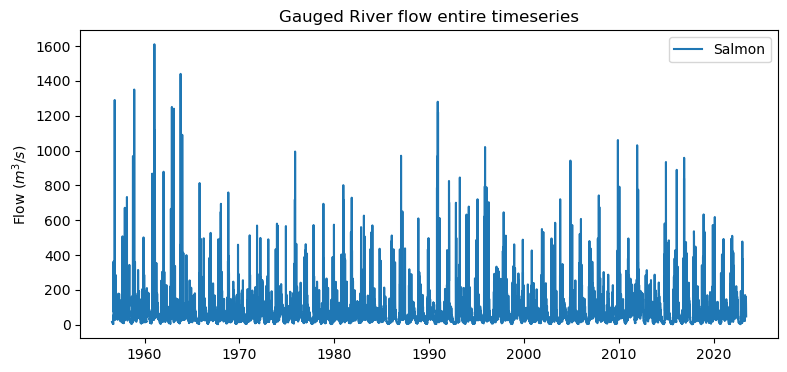

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Salmon['DateTime'], Salmon['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow entire timeseries')

plt.legend()

In [93]:
np.mean(Salmon.groupby(['YYYY']).mean()['DISCHARGE'].values)

/tmp/ipykernel_3966161/1672688322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  np.mean(Salmon.groupby(['YYYY']).mean()['DISCHARGE'].values)


64.78138280050061

/tmp/ipykernel_3966161/3202137495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Salmon.groupby(['YYYY']).mean()
/tmp/ipykernel_3966161/3202137495.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(Salmon.groupby(['YYYY']).mean()['DISCHARGE'], label='Salmon')


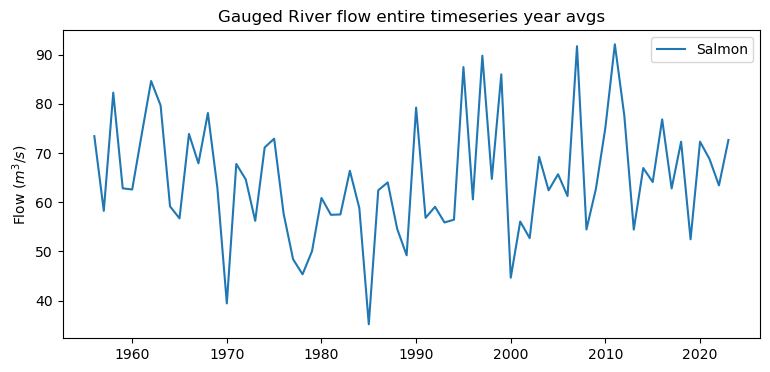

In [94]:
Salmon.groupby(['YYYY']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Salmon.groupby(['YYYY']).mean()['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow entire timeseries year avgs')

plt.legend()